In [14]:
# Import the AutoML class
import AutoML
import importlib
importlib.reload(AutoML)

algorithm = 'LinearRegression'
target_name="chol"
csv_path="csv/heart.csv"

# Initialize the AutoML object
automl = AutoML.AutoML()

# Load and prepare the data
automl.init(csv_path, target_name, algorithm)

#Detect task type
print(f"Detected task type: {automl.task_type}")

# Get the processed data
X, y = automl.get_processed_data()
print("\nProcessed data shape:")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Display first few rows of processed features
print("\nFirst few rows of processed features:")
print(X.head())

# Check outliers before model training
outlier_summary = automl.get_outlier_summary()
print("\nOutlier Summary:")
for column, info in outlier_summary.items():
    print(f"\n{column}:")
    print(f"  Lower bound: {info['lower_bound']:.2f}")
    print(f"  Upper bound: {info['upper_bound']:.2f}")
    print(f"  Number of outliers detected: {info['total_outliers']}")

# Train and evaluate models
results = automl.train_and_evaluate()

# Print all results
for metric_name, value in results.items():
    if isinstance(value, str):  # For classification report
        print(f"\n{metric_name}:\n{value}")
    else:
        print(f"{metric_name}: {value:.4f}")

Detected task type: Regression

Processed data shape:
Features shape: (303, 13)
Target shape: (303,)

First few rows of processed features:
        age       sex        cp  trestbps  fbs   restecg   thalach     exang  \
0  0.952197  0.681005  1.973123  0.828728  0.0 -1.005832  0.013543 -0.696631   
1 -1.915313  0.681005  1.002577 -0.077351  0.0  0.898962  1.641748 -0.696631   
2 -1.474158 -1.468418  0.032031 -0.077351  0.0 -1.005832  0.981665 -0.696631   
3  0.180175  0.681005  0.032031 -0.681403  0.0  0.898962  1.245698 -0.696631   
4  0.290464 -1.468418 -0.938515 -0.681403  0.0  0.898962  0.585615  1.435481   

    oldpeak     slope        ca      thal    target  
0  1.150938 -2.274579 -0.760077 -2.194678  0.914529  
1  2.233684 -2.274579 -0.760077 -0.528043  0.914529  
2  0.338879  0.976352 -0.760077 -0.528043  0.914529  
3 -0.202494  0.976352 -0.760077 -0.528043  0.914529  
4 -0.382951  0.976352 -0.760077 -0.528043  0.914529  

Outlier Summary:

age:
  Lower bound: -2.99
  Upper bo

In [15]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


Data shape: (303, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


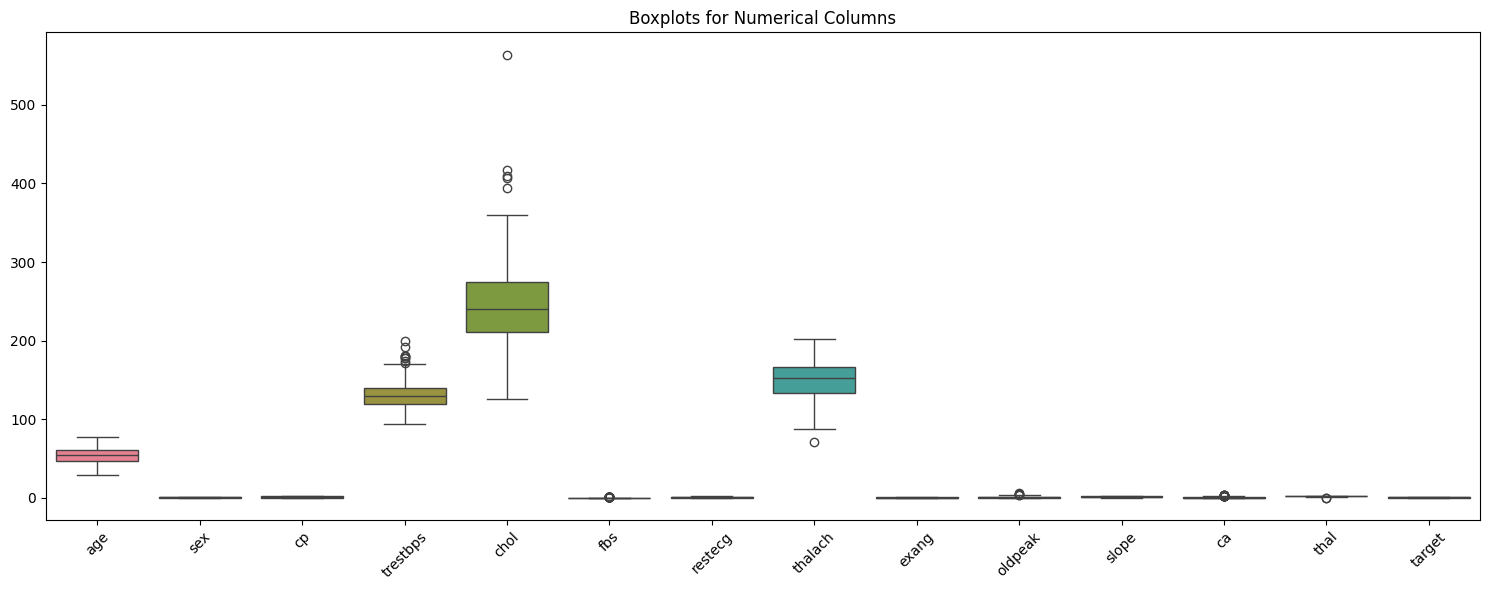

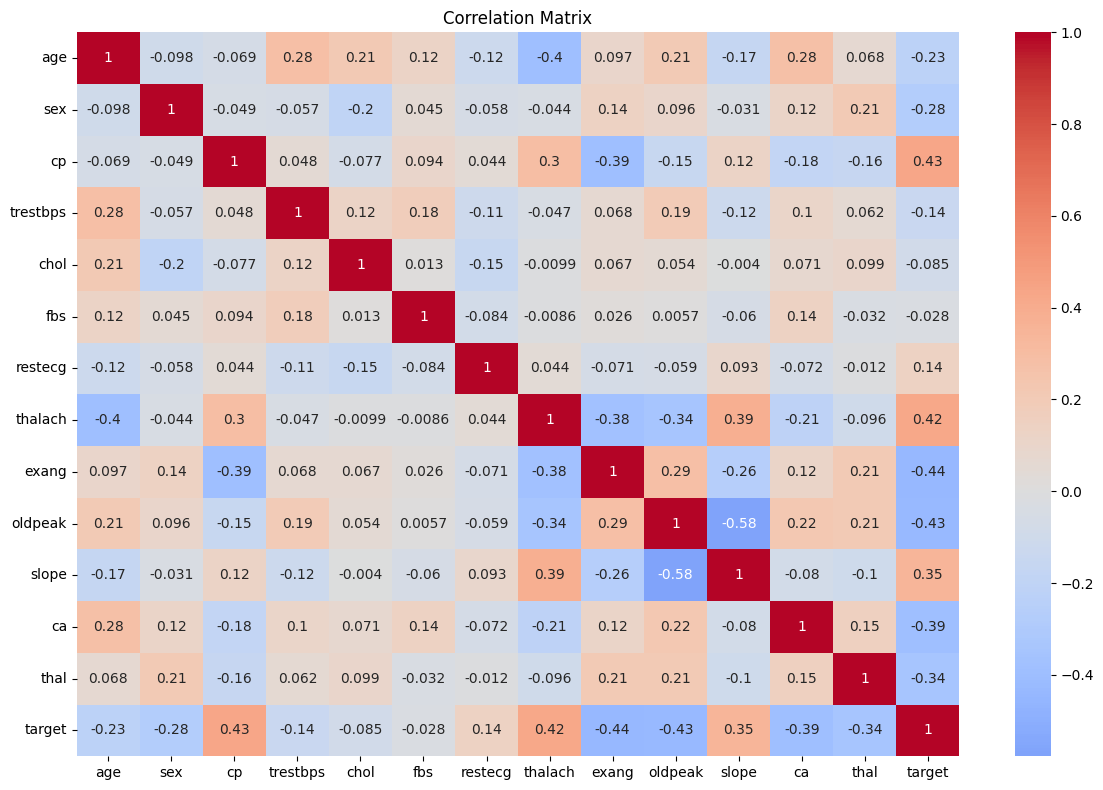


Strong correlations (above 0.3):
age -- thalach: -0.399
cp -- exang: -0.394
cp -- target: 0.434
thalach -- age: -0.399
thalach -- exang: -0.379
thalach -- oldpeak: -0.344
thalach -- slope: 0.387
thalach -- target: 0.422
exang -- cp: -0.394
exang -- thalach: -0.379
exang -- target: -0.437
oldpeak -- thalach: -0.344
oldpeak -- slope: -0.578
oldpeak -- target: -0.431
slope -- thalach: 0.387
slope -- oldpeak: -0.578
slope -- target: 0.346
ca -- target: -0.392
thal -- target: -0.344
target -- cp: 0.434
target -- thalach: 0.422
target -- exang: -0.437
target -- oldpeak: -0.431
target -- slope: 0.346
target -- ca: -0.392
target -- thal: -0.344


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data and confirm it worked
df = pd.read_csv("csv/heart.csv")
print("Data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())


# Create a figure for boxplots to visualize outliers
plt.figure(figsize=(15, 6))
plt.title('Boxplots for Numerical Columns')
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# To get a cleaner view of the strongest correlations (optional)
# Filter for correlations above a certain threshold (e.g., 0.3 or -0.3)
threshold = 0.3
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x,y]) 
             for x, y in zip(*high_corr) if x != y]

print("\nStrong correlations (above {}):".format(threshold))
for var1, var2, corr in high_corr:
    print(f"{var1} -- {var2}: {corr:.3f}")